In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.nn import relu,sigmoid
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import urllib
import zipfile
import shutil

In [1]:
data_url = "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"

In [4]:
download_file_name = "cat_dog.zip"

In [5]:
urllib.request.urlretrieve(data_url , download_file_name)

('cat_dog.zip', <http.client.HTTPMessage at 0x7f7d43162f50>)

In [6]:
import os

In [7]:
print("Current Directory:",os.listdir())

Current Directory: ['.config', 'cat_dog.zip', 'sample_data']


In [8]:
cat_dog_dir='cat_dog/'

In [9]:
try:
    os.mkdir("cat_dog")
except:
    pass

In [10]:
zip_fl=zipfile.ZipFile(download_file_name)
zip_fl.extractall(cat_dog_dir)

In [11]:
cat_dir='./cat_dog/PetImages/Cat/'
dog_dir='./cat_dog/PetImages/Dog/'

In [12]:
print('cat images count',len(os.listdir(cat_dir)))
print('dog images count',len(os.listdir(dog_dir)))

cat images count 12501
dog images count 12501


In [13]:
os.mkdir('./cat_dog/test')
dog_test_dir='./cat_dog/test/dog'
cat_test_dir='./cat_dog/test/cat'
try:
  os.mkdir(dog_test_dir)
except:
  pass

try:
  os.mkdir(cat_test_dir)
except:
  pass

In [16]:
def change_dir(cur_dir,des_dir,num):
  for i in os.listdir(cur_dir)[:num]:
    src=cur_dir+i
    shutil.move(src,des_dir)


In [17]:
change_dir(cat_dir,cat_test_dir,1250)
change_dir(dog_dir,dog_test_dir,1250)

In [19]:
train_dir = "./cat_dog/PetImages/"
for folder in os.listdir(train_dir):
    print("Folder name %s , total images : %5d"%(folder , len(os.listdir(train_dir+folder))))

Folder name Cat , total images : 11251
Folder name Dog , total images : 11251


In [21]:
test_dir = "./cat_dog/test/"
for folder in os.listdir(test_dir):
    print("Folder name %s , total images : %5d"%(folder , len(os.listdir(test_dir+folder))))

Folder name cat , total images :  1250
Folder name dog , total images :  1250


In [23]:
def remove_file_zerosize(folder):
  for i in os.listdir(folder):
    if os.path.getsize(folder+i)<=0:
      os.remove(folder+i)
      print("filename with zero  size:",i)

In [24]:
remove_file_zerosize(cat_dir)

filename with zero  size: 666.jpg


In [25]:
remove_file_zerosize(dog_dir)

filename with zero  size: 11702.jpg


In [28]:
train_Data_gen=ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_Data_gen=ImageDataGenerator(rescale=1/255.0)

In [29]:
train_data=train_Data_gen.flow_from_directory(train_dir,target_size=(150,150),batch_size=100,class_mode='binary')
test_data=test_Data_gen.flow_from_directory(test_dir,target_size=(150,150),batch_size=100,class_mode='binary')

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [30]:
pre_trained_model = InceptionV3(include_top=False , weights=None , input_shape=(150,150,3))
weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

('inception_v3.h5', <http.client.HTTPMessage at 0x7f7d30c7dc10>)

In [31]:
pre_trained_model.load_weights(weights_file)

In [32]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [33]:
last_layer=pre_trained_model.get_layer('mixed7')
x=Flatten()(last_layer.output)
x=Dense(1024,activation='relu')(x)
x=Dense(1,activation='sigmoid')(x)

In [34]:
model=Model(pre_trained_model.input,x)

In [35]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy ,
    optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
    metrics=['acc']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [36]:
history = model.fit(
    train_data,
    epochs=2,
    verbose=1,
    validation_data=test_data ,
)

Epoch 1/2
225/225 [==============================] - ETA: 0s - loss: 0.2304 - acc: 0.9109

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

225/225 [==============================] - 240s 922ms/step - loss: 0.2304 - acc: 0.9109 - val_loss: 0.0680 - val_acc: 0.9748
Epoch 2/2
225/225 [==============================] - 205s 911ms/step - loss: 0.1514 - acc: 0.9371 - val_loss: 0.1097 - val_acc: 0.9576


Text(0.5, 1.0, 'Loss')

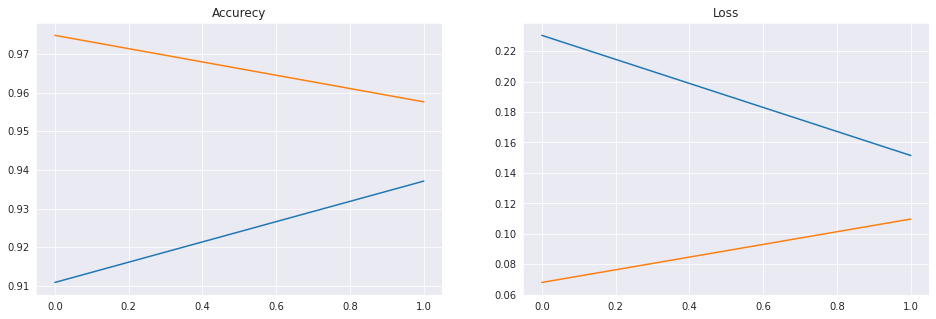

In [37]:
_ , ax = plt.subplots(1,2,figsize = (16,5))
ax[0].plot(history.history['acc'])
ax[0].plot(history.history['val_acc'])
ax[0].set_title("Accurecy")

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title("Loss")

In [38]:
os.chdir("./cat_dog")

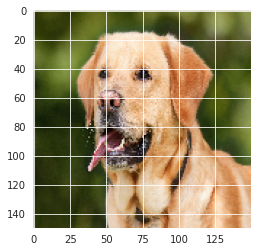

In [39]:
dog_url = "https://scx2.b-cdn.net/gfx/news/hires/2018/2-dog.jpg"
name    = "dog1.jpg"
urllib.request.urlretrieve(dog_url , name)
img_dog = tf.keras.preprocessing.image.load_img(name , target_size=(150,150,3))
img_dog = tf.keras.preprocessing.image.img_to_array(img_dog)
img_dog = img_dog / 255.0
plt.imshow(img_dog)

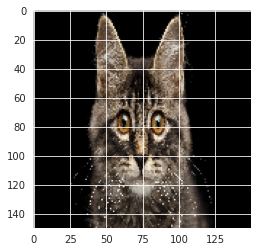

In [40]:
dog_url = "https://images2.minutemediacdn.com/image/upload/c_crop,h_1193,w_2121,x_0,y_64/v1565279671/shape/mentalfloss/578211-gettyimages-542930526.jpg?itok=zmmJgd_3"
name    = "cat1.jpg"
urllib.request.urlretrieve(dog_url , name)
cat_img = tf.keras.preprocessing.image.load_img(name , target_size=(150,150,3))
cat_img = tf.keras.preprocessing.image.img_to_array(cat_img)
cat_img = cat_img / 255.0
plt.imshow(cat_img)

In [41]:
train_data.class_indices

{'Cat': 0, 'Dog': 1}

In [42]:
model.predict(img_dog[tf.newaxis , ])

array([[1.]], dtype=float32)

In [43]:
(model.predict(cat_img[tf.newaxis , ]) > 0.5)

array([[0]])

In [44]:
import numpy as np

In [45]:
a = np.array([img_dog , cat_img])
a.shape

(2, 150, 150, 3)

In [46]:
predict = (model.predict(a) > 0.5).astype(np.int64)

{0: 'Cat', 1: 'Dog'}


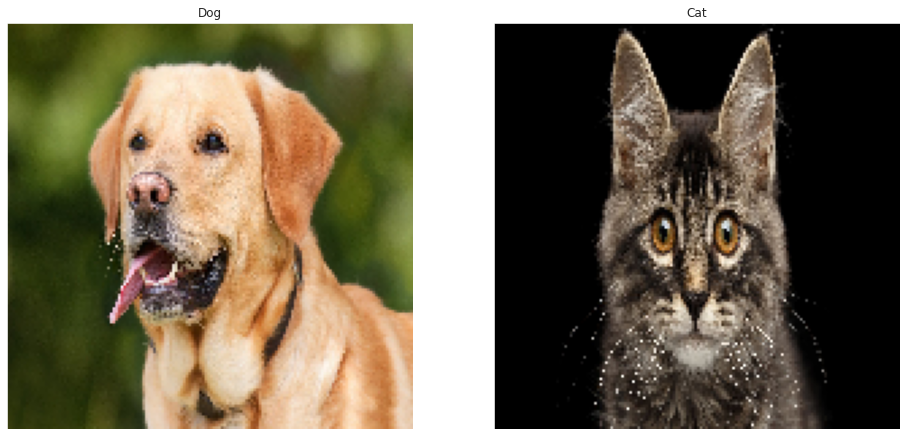

In [47]:
class_classifier = {}
for k , v in train_data.class_indices.items():
    class_classifier[v] = k
print(class_classifier)
f , ax = plt.subplots(1 , 2 , figsize = (16,8))
for c , i , p in zip([0,1],a , predict):
    pre = class_classifier[p[0]]
    ax[c].imshow(i)
    ax[c].set_title(pre)
    ax[c].grid(False)
    ax[c].set_xticks([])
    ax[c].set_yticks([])